# 9장. 지리 정보 분석 (1) 주소데이터분석+맵

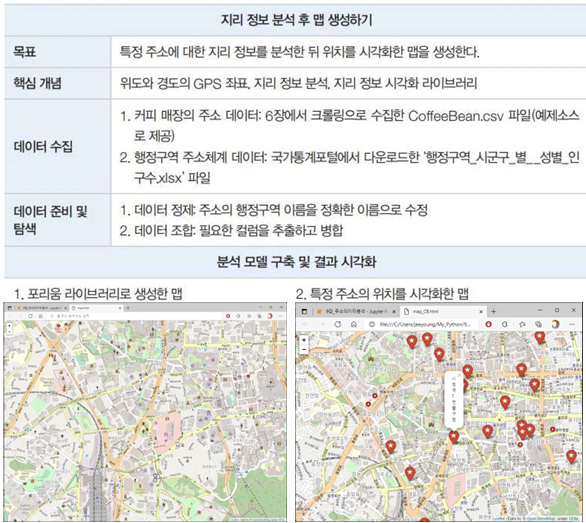
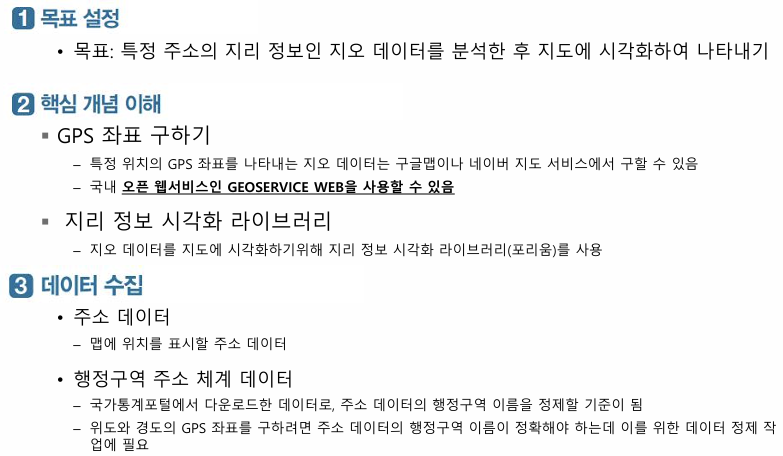

# 1. 데이터 수집

### 데이터 파일 읽어오기

In [1]:
'''
CoffeeBean.csv 파일을 CB 객체로 로드하고, 상위 5개 행의 데이터를 출력하여 head( ) 확인
파이썬에서 CSV 파일을 파싱하는 과정에서 문제가 발생할 수 있는데, 이를 해결하기 위해
engine = 'python' 속성 추가
'''
import pandas as pd

CB = pd.read_csv('./9장_data/CoffeeBean.csv', encoding='CP949', index_col=0, header=0, engine='python')

CB.head()  #작업 내용 확인용 출력

,store,address,phone
0,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
1,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
2,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052
3,신사점,서울시 강남구 도산대로 126,02-548-2741
4,역삼점,"서울시 강남구 논현로 512 지상1,2층",02-569-8051


# 2. 데이터 준비 및 탐색

## 시/도 행정구역 이름 정규화

In [2]:
# for 반복문을 이용하여 각 address 컬럼의 값을 분리하고 split() addr 리스트로 만듬
addr = []

for address in CB.address:
    addr.append(str(address).split())

#작업 내용 확인용 출력
print('데이터 개수 : %d' % len(addr)) 
addr  

데이터 개수 : 232


[['서울시', '강남구', '논현로', '566', '강남차병원1층'],
 ['서울시', '서초구', '강남대로', '369', '1층'],
 ['서울시', '강남구', '압구정로', '461', '네이처포엠빌딩B108,109호'],
 ['서울시', '강남구', '도산대로', '126'],
 ['서울시', '강남구', '논현로', '512', '지상1,2층'],
 ['서울시', '서초구', '강남대로', '213', '24호', '지하1층'],
 ['서울시', '강남구', '삼성로', '716', 'LEE76빌딩2층'],
 ['서울', '서초구', '반포동', '736-17', 'P빌딩', '2층'],
 ['서울시', '강남구', '언주로', '30길', '10,112', '현대비젼21', '112호'],
 ['서울시', '강남구', '선릉로', '749', '1,2층'],
 ['서울시', '강남구', '도산대로49길', '13', '1층', '17,18호'],
 ['서울시', '강남구', '선릉로', '157길', '12', '석전빌딩', '1~4층'],
 ['서울시', '서초구', '강남대로', '51길', '1', '511', 'TOWER', '1층'],
 ['서울시', '강남구', '논현', '231-13호', '팍스타워지하1층'],
 ['서울', '강남구', '테헤란로87길', '46', '지하', '2층'],
 ['서울시', '강남구', '영동대로', '511', '트레이드타워', '지하1층'],
 ['서울시', '강남구', '영동대로', '607', '1,2층'],
 ['서울시', '송파구', '석촌호수로', '118', '1층'],
 ['서울시', '서초구', '서초동', '1685-8호', '101~2호,113~4호,121호'],
 ['서울시', '강남구', '논현로', '717', '1층'],
 ['서울시', '서초구', '서초대로74길', '11', '지하2층'],
 ['서울시', '서초구', '서초대로74길', '4', '삼성생명보험서초

### - addr에서 행정구역 표준 이름이 아닌것 수정하기

In [3]:
# if 조건 검사를 통해 기준에 맞지 않는 이름을 수정하면서 분리했던 항목을 연결하여
# join() addr2 리스트를 만듬
addr2 = []

# addr에서 행정구역 표준 이름이 아닌것 수정하기
for i in range(len(addr)):
    if addr[i][0] == "서울": addr[i][0]="서울특별시"
    elif addr[i][0] == "서울시": addr[i][0]="서울특별시"
    elif addr[i][0] == "부산시": addr[i][0]="부산광역시"
    elif addr[i][0] == "인천": addr[i][0]="인천광역시"
    elif addr[i][0] == "광주": addr[i][0]="광주광역시"
    elif addr[i][0] == "대전시": addr[i][0]="대전광역시"
    elif addr[i][0] == "울산시": addr[i][0]="울산광역시"    
    elif addr[i][0] == "세종시": addr[i][0]="세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0]="경기도"
    elif addr[i][0] == "충북": addr[i][0]="충청북도"
    elif addr[i][0] == "충남": addr[i][0]="충청남도"
    elif addr[i][0] == "전북": addr[i][0]="전라북도"
    elif addr[i][0] == "전남": addr[i][0]="전라남도"
    elif addr[i][0] == "경북": addr[i][0]="경상북도"
    elif addr[i][0] == "경남": addr[i][0]="경상남도"
    elif addr[i][0] == "제주": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0]="제주특별자치도"                                
       
    addr2.append(' '.join(addr[i]))  

addr2 #작업 내용 확인용 출력

['서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울특별시 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울특별시 강남구 테헤란로87길 46 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 1,2층',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서울특별시 서초구 서초대로74길 11 지하2층',
 '서울특별시 서초구 서초대로74길 4 삼성생명보험서초타워내지하1층',
 '서울특별시 서초구 방배중앙로 187',
 '서울특별시 강남구 테헤란로 20길 10 쓰리엠타워1층',
 '서울특별시 강남구 테헤란로 70길 12 1층',
 '서울특별시 강남구 봉은사로 628 엘슨빌딩1층',
 '서울특별시 송파구 오금로 11길 7',
 '서울특별시 강남구 논현로 38길 42 418호',
 '서울특별시 서초구 서초중앙로 43 로얄타워1층',
 '서울특별시 강남구 테헤란로4길 28 826-28호 1층',
 '서울특별시 강남구 테헤란로87길 36 공항타워 1층',
 '서울특별시 강남구 도산대

In [4]:
# addr2를 DataFrame 타입으로 변경하고, 컬럼 이름을 address2로 지정
addr2 = pd.DataFrame(addr2, columns=['address2'])

addr2 #작업 내용 확인용 출력

,address2
0,서울특별시 강남구 논현로 566 강남차병원1층
1,서울특별시 서초구 강남대로 369 1층
2,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호"
3,서울특별시 강남구 도산대로 126
4,"서울특별시 강남구 논현로 512 지상1,2층"
...,...
227,경기도 화성시 동탄중앙로220 타임테라스A 블록 1층 110호-1호
228,서울특별시 중구 무교로 12(무교동) 정오빌딩 1층
229,서울특별시 종로구 종로 98 1층
230,서울특별시 강남구 선릉로 157길 22 2층


In [5]:
# CB와 addr2를 옆으로 axis=1 결합하여 concat() CB2를 만듬
CB2 = pd.concat([CB, addr2],  axis=1 )

CB2.head()  #작업 내용 확인용 출력

,store,address,phone,address2
0,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
1,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
2,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호"
3,신사점,서울시 강남구 도산대로 126,02-548-2741,서울특별시 강남구 도산대로 126
4,역삼점,"서울시 강남구 논현로 512 지상1,2층",02-569-8051,"서울특별시 강남구 논현로 512 지상1,2층"


In [6]:
# 시도 이름이 수정된 데이터를 CB2로 저장. 작업 완료
CB2.to_csv('./9장_data/CoffeeBean_2.csv',encoding='CP949', index = False)

# 3. 데이터 모델링

### - 지도 정보 시각화 라이브러리 설치 및 임포트하기

In [7]:
!pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 262.6 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.4 kB 409.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 525.0 kB/s eta 0:00:00


In [8]:
import folium

### 1) 숭례문 좌표를 사용하여 지도 객체 테스트하기

In [9]:
map_osm = folium.Map(location=[37.560284, 126.975334], zoom_start = 16)

In [17]:
map_osm.save('./9장_data/map.html')

### 2) 정리해둔 CoffeeBean_2.csv 파일 로드

In [18]:
CB_file = pd.read_csv('./9장_data/CoffeeBean_2.csv',encoding='cp949',  engine='python')

CB_file.head() #작업 내용 확인용 출력

,store,address,phone,address2
0,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
1,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
2,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호"
3,신사점,서울시 강남구 도산대로 126,02-548-2741,서울특별시 강남구 도산대로 126
4,역삼점,"서울시 강남구 논현로 512 지상1,2층",02-569-8051,"서울특별시 강남구 논현로 512 지상1,2층"


### 3) 지오서비스웹(GEOSERVICE-WEB)을 사용하여 구한 GPS 좌표 파일 로드

In [20]:
# CB_geo.shp_2.csv 파일을 CB_geoData객체로 로드
CB_geoData = pd.read_csv('./9장_data/CB_geo.csv',encoding='utf8',  engine='python')

len(CB_geoData) #작업 내용 확인용 출력

228

In [21]:
# 지도 객체인 map_CB를 생성
map_CB = folium.Map(location=[37.560284, 126.975334], zoom_start = 15)

In [22]:
'''
for 반복문을 사용하여 CB_geoData객체에 있는 매장 정보를 하나씩 읽음
읽어온 데이터프레임에서 ‘_Y’ 열이 위도이고 ‘_X’ 열이 경도이므로, 
위도-경도 순서대로 location 값으로 설정.
매장에 대한 마커의 팝업글자는 매장이름으로 설정하고
popup = store['store'] , 마커모양은 빨간색별모양으로
설정하여 icon = 'star' 마커를 만든뒤 folium.Marker( ) 지도객체 map_CB에 추가 add_to(map_CB).
'''
for i, store in CB_geoData.iterrows():   
    folium.Marker(location=[store['_Y'], store['_X']], popup= store['store'], icon=folium.Icon(color='red', icon='star')).add_to(map_CB)

In [23]:
# 완성된 지오맵을 저장
map_CB.save('./9장_data/map_CB.html')

In [25]:
import webbrowser

webbrowser.open('C:/Users/lbm03/bigdata/My_Python_2024/9장_data/map_CB.html')

True